# Covid-19 Vaccines Moving Averages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Covid-19 Vaccines
title = "COVID-19"
symbols = ['BNTX', 'JNJ', 'MRNA', 'PFE']
start = '2020-01-01'
end = '2022-09-03'

In [3]:
# For loop for grabing yahoo finance data and setting as a dataframe
for stock in symbols:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
company_list = [BNTX, JNJ, MRNA, PFE]
company_name = ["BioNTech SE", "Johnson & Johnson", "Moderna, Inc.", "Pfizer Inc."]

for company, com_name in zip(company_list, company_name):
    company["Company Name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)



,Open,High,Low,Close,Adj Close,Volume,Company Name
Date,,,,,,,
2022-08-22,49.209999,49.400002,48.740002,48.900002,48.900002,13601200,Pfizer Inc.
2022-08-23,48.419998,48.520000,47.759998,48.009998,48.009998,16248900,Pfizer Inc.
2022-08-24,47.900002,48.009998,47.380001,47.430000,47.430000,15551500,Pfizer Inc.
2022-08-25,47.520000,47.950001,47.270000,47.900002,47.900002,14460000,Pfizer Inc.
2022-08-26,47.619999,47.959999,46.700001,46.820000,46.820000,16546700,Pfizer Inc.
2022-08-29,46.380001,46.689999,46.119999,46.230000,46.230000,13400500,Pfizer Inc.
2022-08-30,46.340000,46.349998,45.799999,45.849998,45.849998,16303000,Pfizer Inc.
2022-08-31,46.009998,46.290001,45.130001,45.230000,45.230000,26416800,Pfizer Inc.
2022-09-01,45.139999,46.650002,45.139999,46.630001,46.630001,19947600,Pfizer Inc.


In [5]:
BNTX.head()

,Open,High,Low,Close,Adj Close,Volume,Company Name
Date,,,,,,,
2020-01-02,35.750000,38.500000,35.360001,38.500000,37.996727,139500,BioNTech SE
2020-01-03,38.000000,41.250000,36.419998,40.049999,39.526466,176000,BioNTech SE
2020-01-06,40.110001,45.000000,40.099998,44.580002,43.997250,333300,BioNTech SE
2020-01-07,47.400002,48.849998,41.180000,43.340000,42.773460,562100,BioNTech SE
2020-01-08,44.299999,46.330002,44.180000,45.099998,44.510452,193900,BioNTech SE


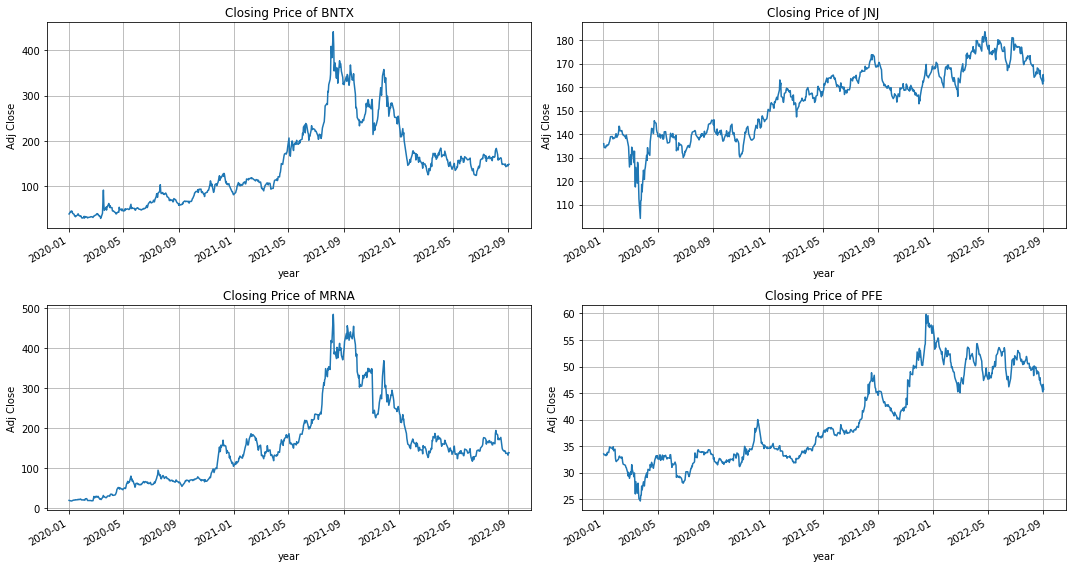

In [6]:
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=2, bottom=1)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.grid()
    plt.ylabel('Adj Close')
    plt.xlabel('year')
    plt.title(f"Closing Price of {symbols[i - 1]}")
    
plt.tight_layout()

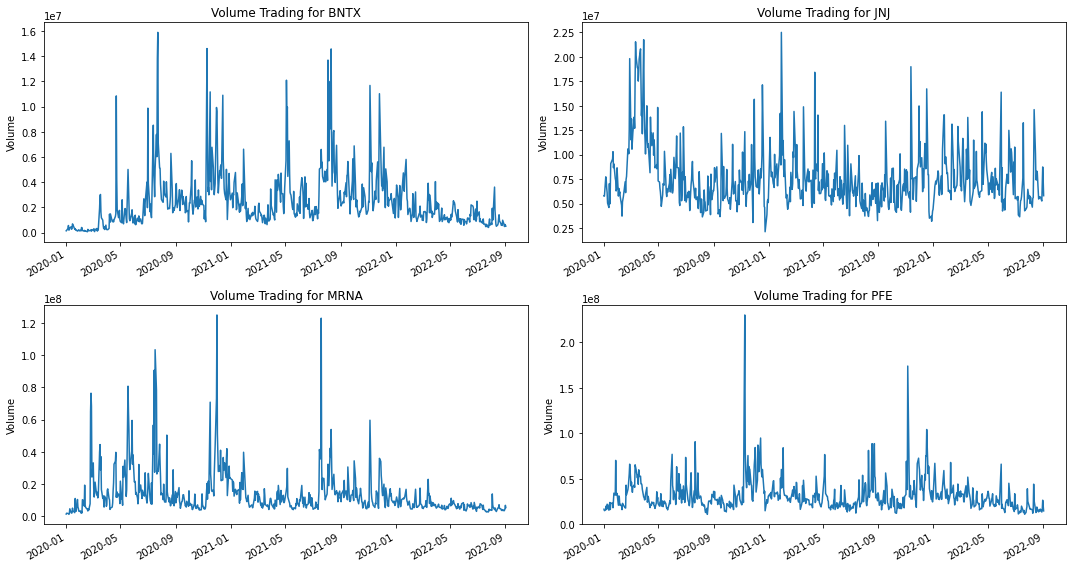

In [7]:
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume Trading for {symbols[i - 1]}")

plt.tight_layout()

In [8]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

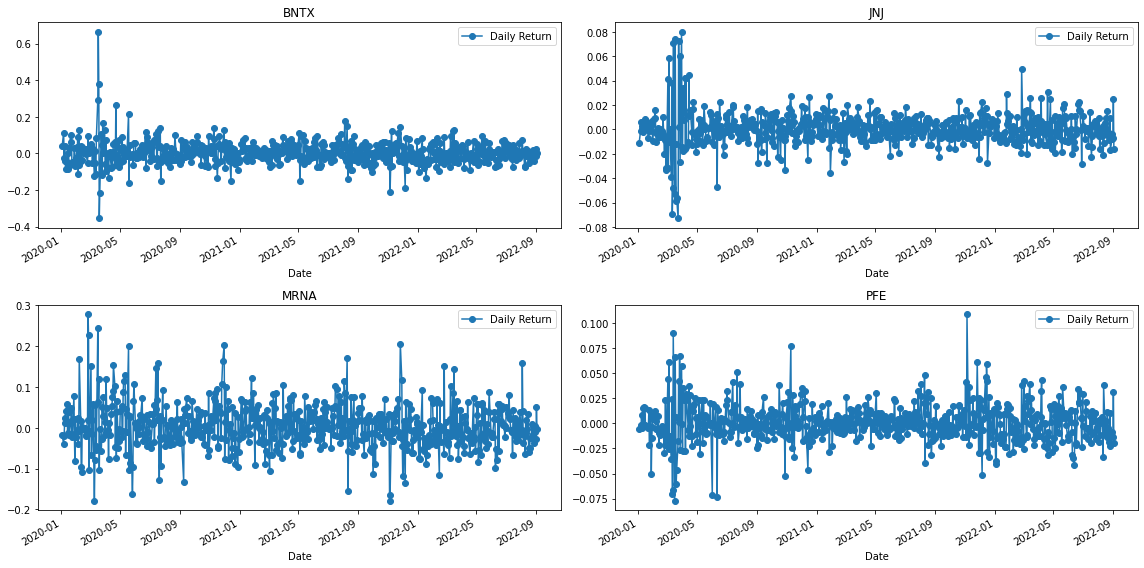

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(16)

BNTX['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('BNTX')

JNJ['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('JNJ')

MRNA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MRNA')

PFE['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('PFE')

fig.tight_layout()

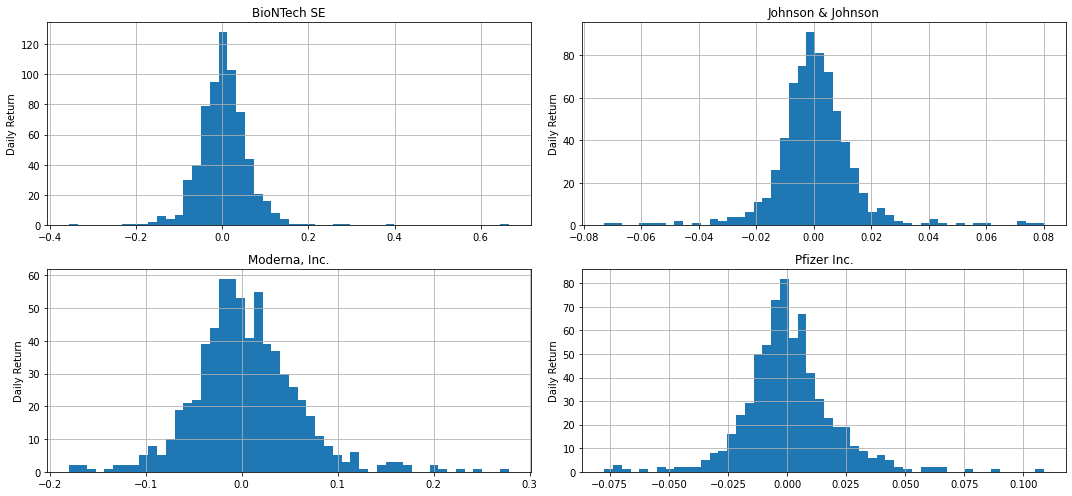

In [10]:
plt.figure(figsize=(15, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

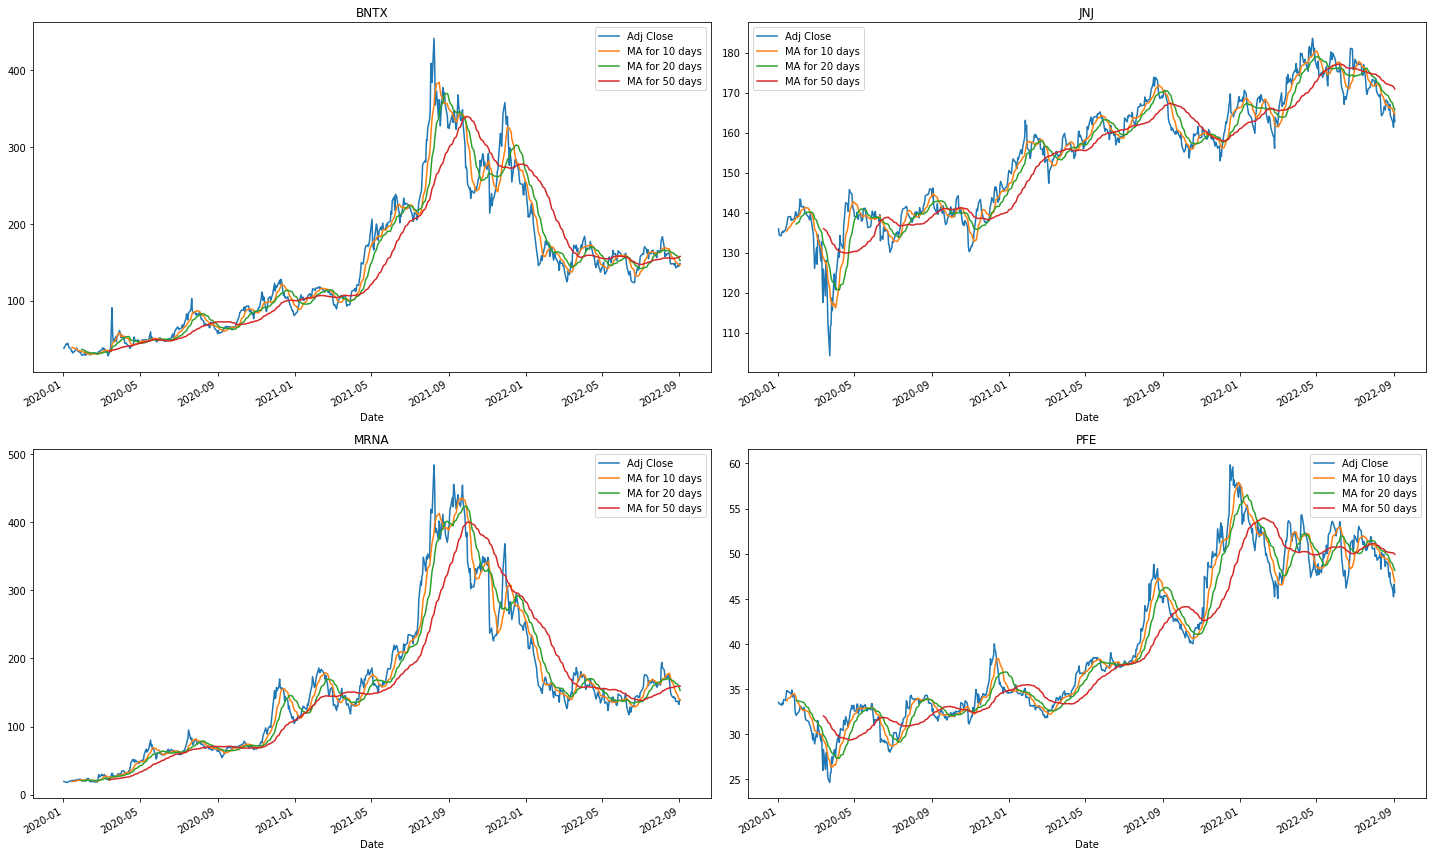

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = (f"MA for {ma} days")
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(20)

BNTX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('BNTX')

JNJ[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('JNJ')

MRNA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MRNA')

PFE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('PFE')

fig.tight_layout()

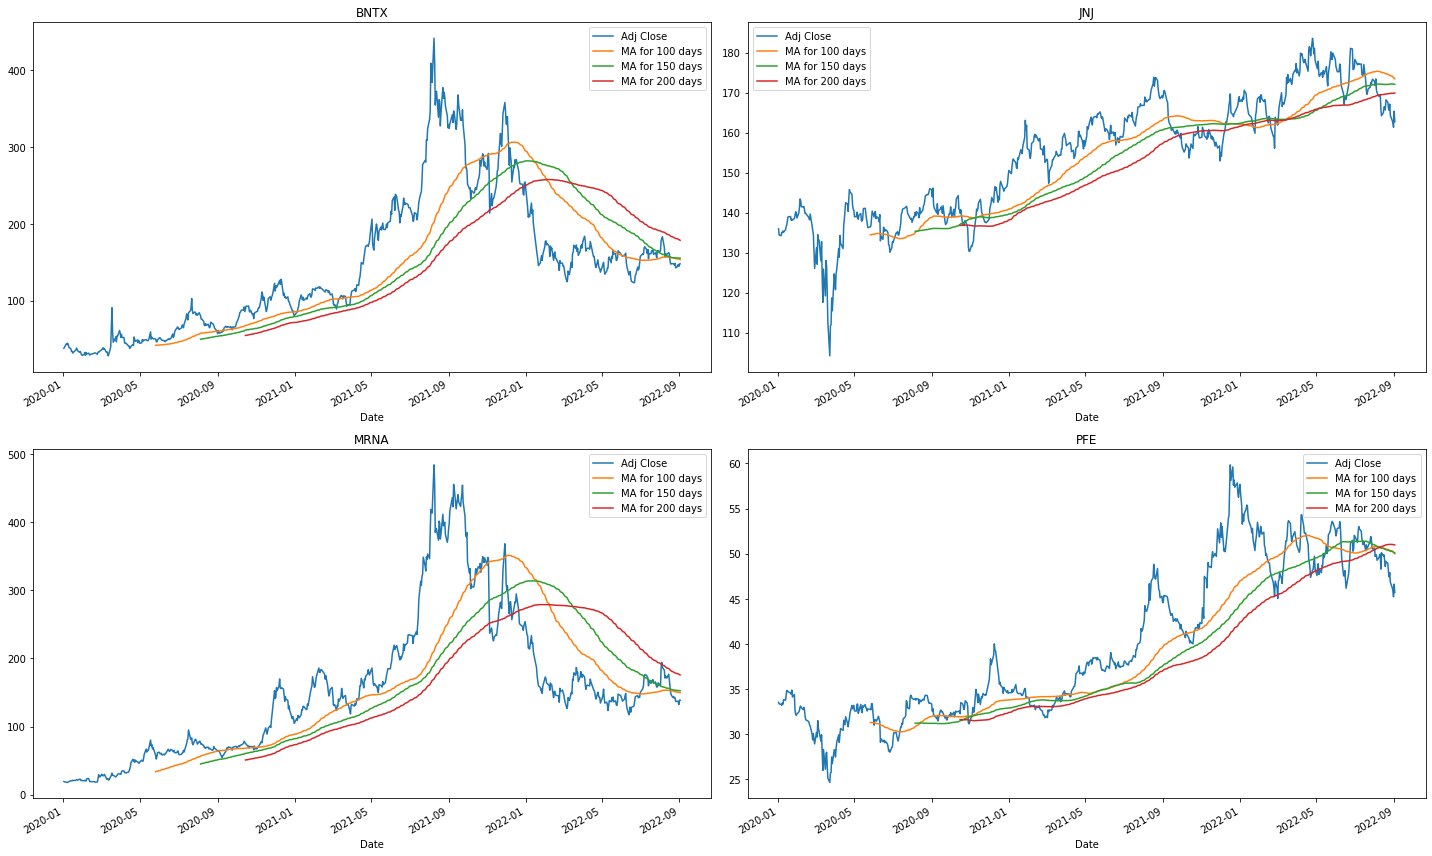

In [12]:
ma_day = [100, 150, 200]

for ma in ma_day:
    for company in company_list:
        column_name = (f"MA for {ma} days")
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(20)

BNTX[['Adj Close', 'MA for 100 days', 'MA for 150 days', 'MA for 200 days']].plot(ax=axes[0,0])
axes[0,0].set_title('BNTX')

JNJ[['Adj Close', 'MA for 100 days', 'MA for 150 days', 'MA for 200 days']].plot(ax=axes[0,1])
axes[0,1].set_title('JNJ')

MRNA[['Adj Close', 'MA for 100 days', 'MA for 150 days', 'MA for 200 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MRNA')

PFE[['Adj Close', 'MA for 100 days', 'MA for 150 days', 'MA for 200 days']].plot(ax=axes[1,1])
axes[1,1].set_title('PFE')

fig.tight_layout()